# Movies Data Analysis : Correlation

In [5]:
# First Let's import the packeges we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib 
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

from pandas_profiling import ProfileReport

In [2]:
# Let's load the dataset
df = pd.read_csv('movies.csv',encoding='latin-1')

In [3]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [9]:
# To create quick report of data
profile = ProfileReport(df, title='Movies Profile Report', explorative=True)

In [10]:
profile.to_widgets()

Budget and Gross have highest correlation

In [12]:
# Finding correlation 
df.corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [14]:
# Let's see if there is any missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [16]:
# Data types of columns
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [20]:
# Correcting year movie released
df['yearcorrect']=df['released'].astype(str).str[:4]

In [21]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [23]:
# Sorting data by gross value
df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000.0,Lucasfilm,USA,J.J. Abrams,Action,936662225.0,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000.0,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625.0,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302.0,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000.0,Universal Pictures,USA,Colin Trevorrow,Action,652270625.0,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000.0,Marvel Studios,USA,Joss Whedon,Action,623357910.0,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0.0,Zentropa International Norway,Norway,Petter Næss,Action,547.0,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0.0,Isle of Man Film,UK,Sheree Folkson,Comedy,542.0,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0.0,Cinetel Films,USA,Steven R. Monroe,Crime,441.0,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000.0,Daybreak,USA,George Huang,Comedy,309.0,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


[Text(0.5, 1.0, 'Budget vs Gross correlation')]

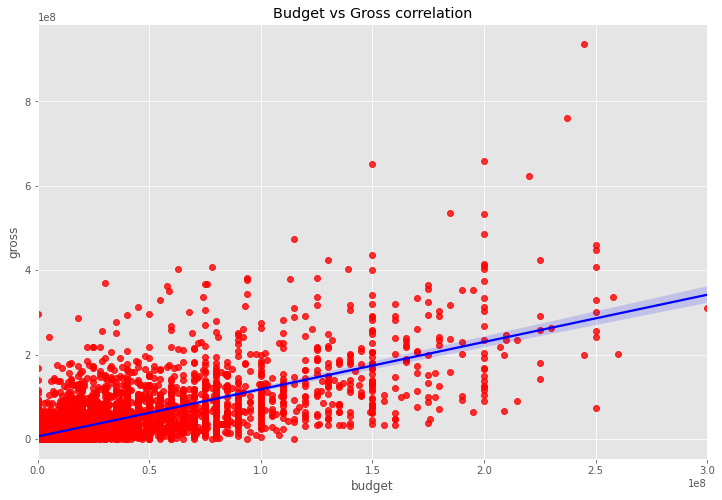

In [25]:
# Plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"}).set(title='Budget vs Gross correlation')

[Text(0.5, 1.0, 'score vs Gross correlation')]

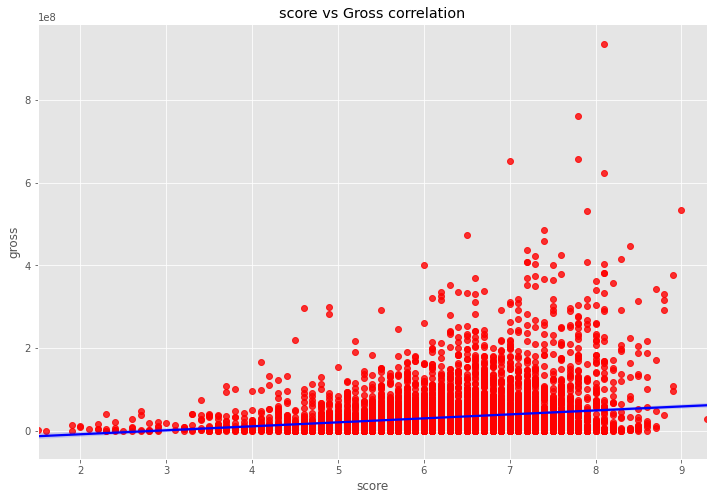

In [28]:

sns.regplot(x="score", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"}).set(title='score vs Gross correlation')

#### Conclusion:

Low budget movies and low voted movies all seem to have poor profit.

As the budget raises, there is an exponencial tendency for gross improvement.

There is no clear relation in how much a movie profits from the amount of votes it has.

#### Numerical Features Description

In [29]:
df.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


Some conclusions:

1.El set has 6820 titles.

2.The studied time lapse goes from 1986 to 2016.

3.The average film duration is 1h 46min.

#### How many films there are in the set per year?

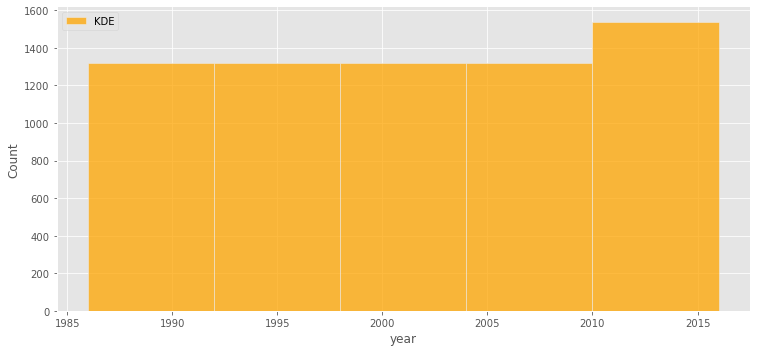

In [32]:
sns.displot(df['year'], bins = 5, color = 'orange', label = 'KDE')
plt.legend()
plt.gcf().set_size_inches(12, 5)

It seems there are the same amounts of movies released per each year!

#### Top countries with most released films

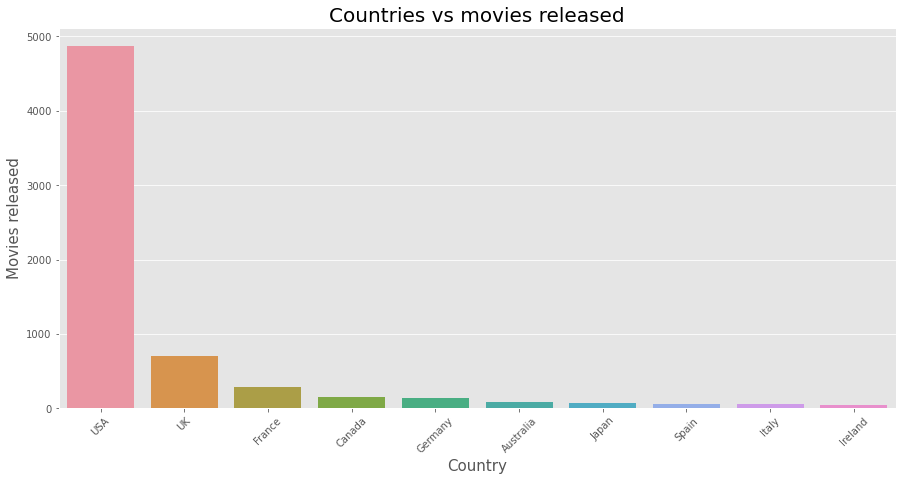

In [34]:
Countries = pd.DataFrame(df['country'].value_counts())
Ten_countries = pd.DataFrame(df['country'].value_counts()).head(10)

sns.barplot(x = Ten_countries.index, y = Ten_countries['country'])

labels =Ten_countries.index.tolist()
plt.gcf().set_size_inches(15, 7)

plt.title('Countries vs movies released', fontsize = 20)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Movies released', fontsize = 15)

plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9] , labels = labels, rotation = '45')
plt.show()

#### Company Analysis

In [35]:
df.groupby('company').size()

company
"DIA" Productions GmbH & Co. KG    1
1+2 Seisaku Iinkai                 1
101st Street Films                 1
10th Hole Productions              1
120 Films                          1
                                  ..
Zucker Brothers Productions        1
double A Films                     1
erbp                               1
i5 Films                           1
micro_scope                        1
Length: 2179, dtype: int64

There are 2179 different companies

In [38]:
company = df['company'].value_counts()
company = pd.DataFrame(company) 
company = company.head(10) 
company.head(3)

,company
Universal Pictures,302
Warner Bros.,294
Paramount Pictures,259


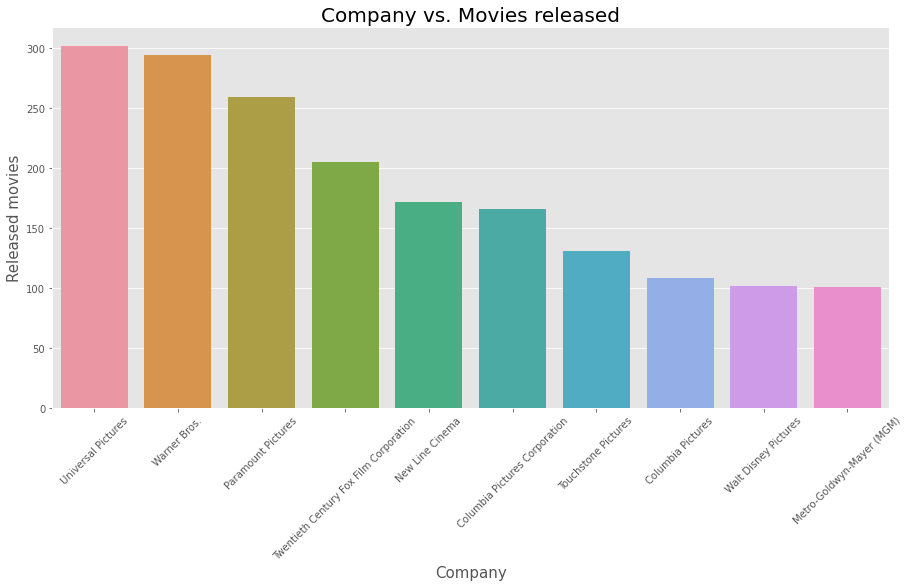

In [39]:
sns.barplot(x = company.index, y = company['company'])

labels = company.index.tolist()
plt.gcf().set_size_inches(15, 7)

plt.title('Company vs. Movies released', fontsize = 20)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Released movies', fontsize = 15)
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9] , labels = labels, rotation = '45')
plt.show()

In [41]:
Porcentaje = company.sum() / df.shape[0] * 100
Porcentaje

company    26.979472
dtype: float64

#### Conclusion:

The 10 biggest companies around the world concentrate 27% of all the movies released within those 30 years.

#### Genre and rating

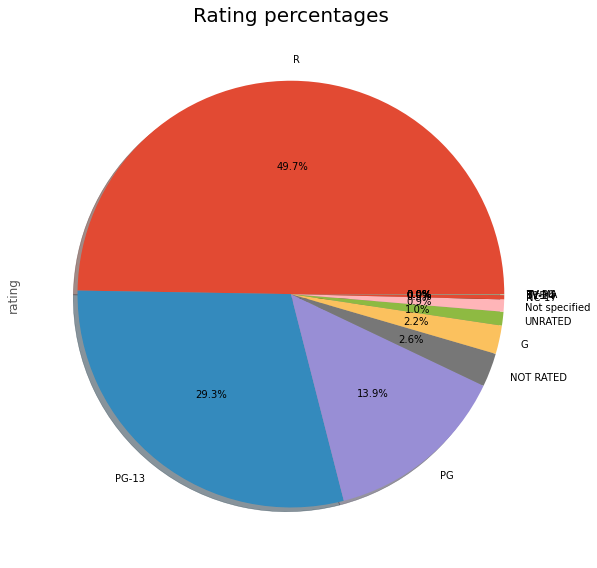

In [43]:
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title('Rating percentages', fontsize = 20)
plt.tight_layout()
plt.show()

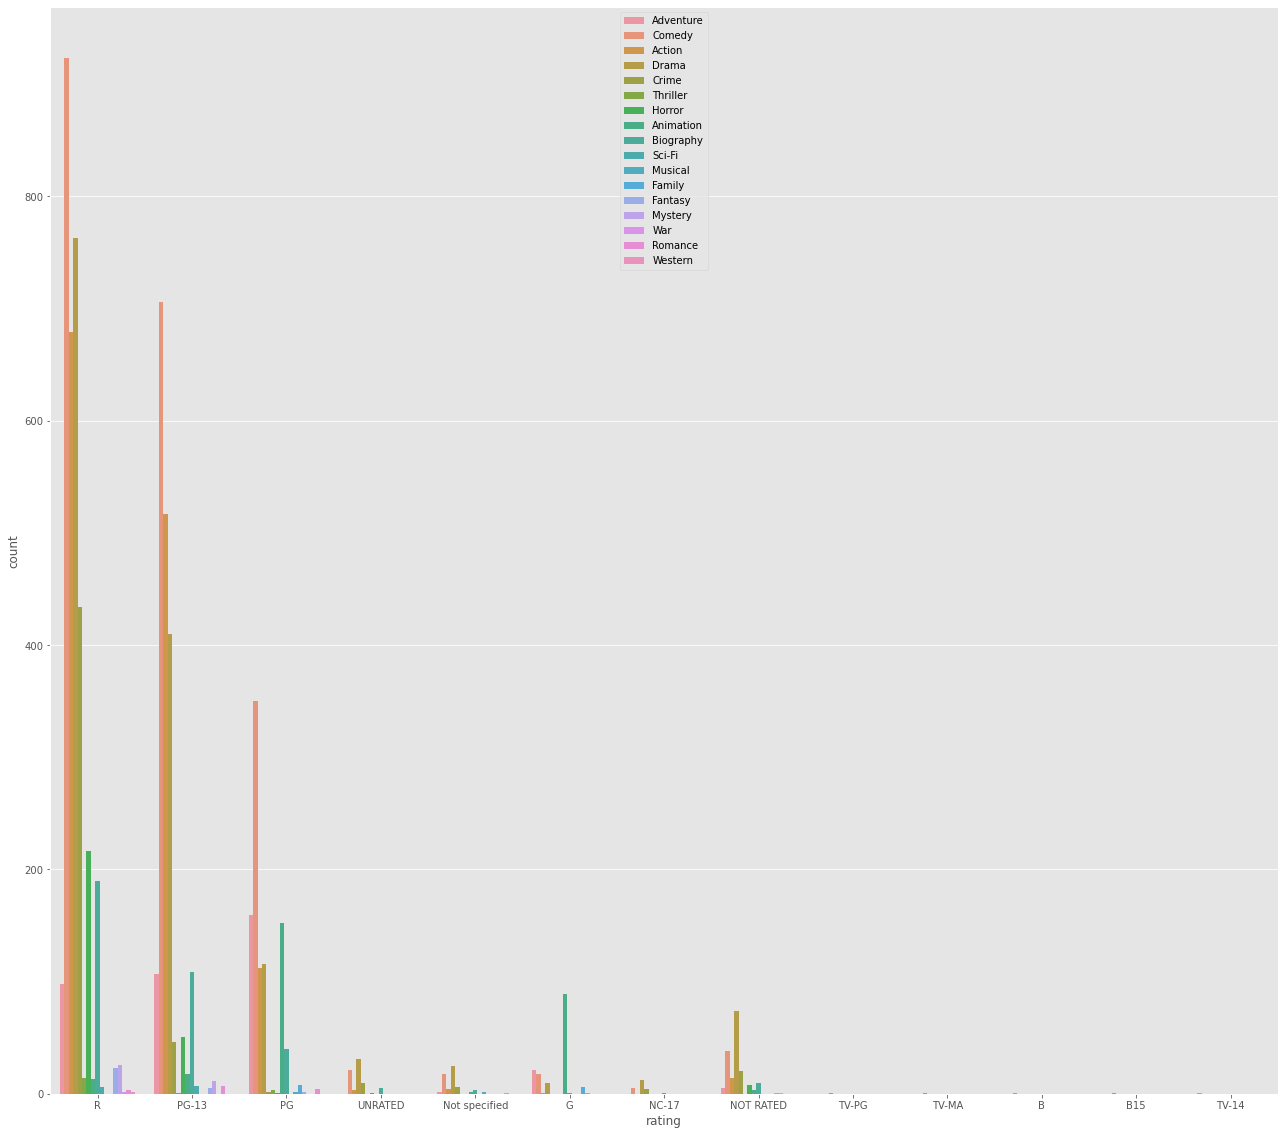

In [47]:
plt.figure(figsize = (22,20))
sns.countplot(x = 'rating',data = df ,hue='genre')
plt.legend(loc='upper center')
plt.show()

#### Conclusion:

We can see that most of the movies are R and PG-13 rated, and that most movies are from Adventure, Action and Comedy genres.
G rated movies are mostly family ones! (as expected!)

# Thank You